In [1]:
TFile *ipfMe = new TFile("Gdd_100_109.root");
TTree *treeMe = (TTree*)ipfMe->Get("tree");
TFile *ipfLi = new TFile("dd100_109.root");
TTree *treeLi = (TTree*)ipfLi->Get("tree");
TCanvas* c1 = new TCanvas;

In [2]:
treeMe->Print();

******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :  7874962 : Total =        78907617 bytes  File  Size =   42346021 *
*        :          : Tree compression factor =   1.86                       *
******************************************************************************
*Br    0 :nd        : nd/S                                                   *
*Entries :  7874962 : Total  Size=   15781452 bytes  File Size  =    1418453 *
*Baskets :      351 : Basket Size=    3200512 bytes  Compression=  11.12     *
*............................................................................*
*Br    1 :ex        : ex/S                                                   *
*Entries :  7874962 : Total  Size=   15781452 bytes  File Size  =   10720365 *
*Baskets :      351 : Basket Size=    3200512 bytes  Compression=   1.47     *
*...................................................

二者投影谱形基本相同，但统计不同；统计差异来源于对多重性不同的限制方法

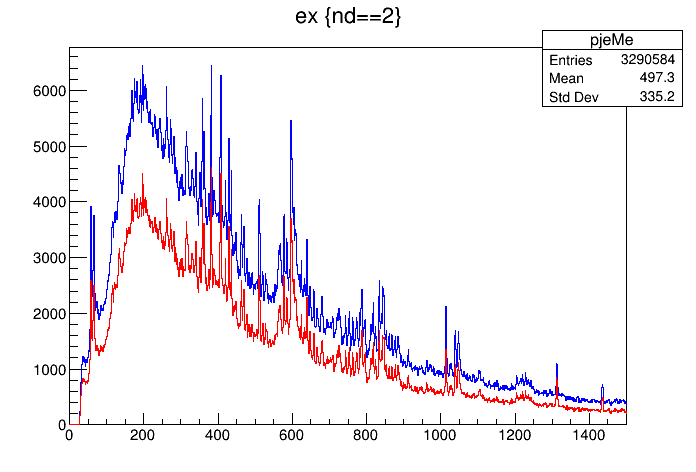

In [3]:
treeMe->Draw("ex>>pjeMe(1500,0,1500)","nd==2");
TH1D *pjeMe = (TH1D*)gROOT->FindObject("pjeMe");
pjeMe->SetLineColor(kBlue);

treeLi->Draw("dx>>pjeLi(1500,0,1500)");
TH1D *pjeLi = (TH1D*)gROOT->FindObject("pjeLi");
pjeLi->SetLineColor(kRed);

pjeMe->Draw();
pjeLi->Draw("same");
c1->Draw();

In [5]:
gROOT->ProcessLine(".x makeaggmat.C");

Generate gg matix to [Gddmat.root] from [Gdd.root]


In [6]:
%jsroot on

### 总投影谱

In [7]:
gROOT->ProcessLine(".x agg.C");

load ROOT file: Gddmat.root


是否可以开不对称的窗？

In [8]:
newcanvas();
setpeakwidth(-2,3);
setnpeaks(10);
gx(818.6);

投影谱上 153keV 不干净，且峰中心在 \[152,153)；开窗效果不好

In [10]:
newcanvas();
setpeakwidth(-2,2);
setnpeaks(30);
gx(153.6);

1235 keV 开窗能看到 153 keV

In [9]:
newcanvas();
setpeakwidth(-2,3);
setnpeaks(10);
gx(1235.2);

273 keV 开窗谱中，363 keV 峰形不太正常

In [11]:
newcanvas();
setpeakwidth(-3,1);
setnpeaks(30);
gx(273.9);